In [1]:
#本文是线性回归模型
import numpy as np
import matplotlib.pyplot as plt

#load data from file
#从txt文件导入数据，
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in xrange(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)
    return np.array(data)

#打印出来看一下数据集大小  
data = load_data('ex1data1.txt')
print data.shape
print data[:5]

X = data[:,:-1]
y = data[:,-1:]
print X.shape
print y.shape
print X[:5]
print y[:5]




(97L, 2L)
[[  6.1101  17.592 ]
 [  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]]
(97L, 1L)
(97L, 1L)
[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]]
[[ 17.592 ]
 [  9.1302]
 [ 13.662 ]
 [ 11.854 ]
 [  6.8233]]


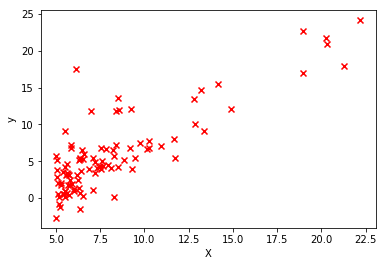

In [2]:
#plot data
#可视化一下数据集
plt.scatter(X,y,color = 'r',marker= 'x')
plt.xlabel('X')
plt.ylabel('y')
plt.show()



In [3]:
#compute the cost 
num_train = X.shape[0]
one = np.ones((num_train,1)) 
X = np.hstack((one,data[:,:-1])) #add ones
W = np.zeros((2,1)) #w0 ,w1
print X.shape
print W
#定义一下计算cost的函数，并且测试一下是否正确
def compute_cost(X_test,y_test,theta):
    num_X = X_test.shape[0]
    cost = 0.5 * np.sum(np.square(X_test.dot(theta) - y_test)) / num_X
    return cost

cost_1 = compute_cost(X,y,W)
print 'cost =%f,with W =[0,0]'%(cost_1)
print 'Expected cost value (approx) 32.07'
cost_2 = compute_cost(X,y,np.array([[-1],[2]]))
print 'cost =%f,with W =[-1,2]'%(cost_2)
print 'Expected cost value (approx) 54.24'


(97L, 2L)
[[ 0.]
 [ 0.]]
cost =32.072734,with W =[0,0]
Expected cost value (approx) 32.07
cost =54.242455,with W =[-1,2]
Expected cost value (approx) 54.24


In [4]:
# gradient descent
#定义一下梯度下降函数，更新参数theta。测试一下正确
def gradient_descent(X_test,y_test,theta,alpha = 0.01,iters = 1500):
    J_history = []
    num_X = X_test.shape[0]
    for i in xrange(iters):
        theta = theta - alpha * X_test.T.dot(X_test.dot(theta) - y_test) / num_X
        cost = compute_cost(X_test,y_test,theta)
        J_history.append(cost)
    return theta,J_history

theta,J_history = gradient_descent(X,y,np.array([[0.001],[0.001]]))
print theta
print 'Expected theta values (approx) W = [-3.6303,1.1664] '



[[-3.63023197]
 [ 1.16635638]]
Expected theta values (approx) W = [-3.6303,1.1664] 


In [6]:
#predict 预测一下
predict1 = np.array([[1,3.5]]).dot(theta)
predict2 = np.array([[1,7]]).dot(theta)
print predict1*10000,predict2*10000


[[ 4520.15347702]] [[ 45342.62662719]]


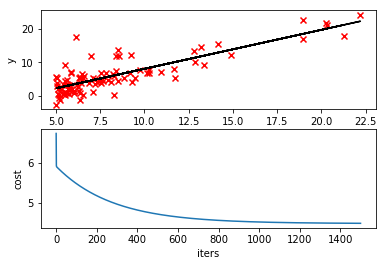

In [7]:
#plot the result可视化一下回归的曲线
plt.subplot(211)
plt.scatter(X[:,1],y,color = 'r',marker= 'x')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X[:,1],X.dot(theta),'-',color = 'black')
#可视化一下cost变化曲线
plt.subplot(212)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')
plt.show()



In [13]:
#可视化一下3d图像，因为J与theta0和theta1两个参数有关
#Visualizing J(theta_0, theta_1)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-1, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.array([[theta0Vals[i]], [theta1Vals[j]]]).reshape(-1,1)
        JVals[i,j] = compute_cost(X,y,col)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
print JVals.shape,JVals[0,0],JVals[1,1] #test correct

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0Vals, theta1Vals, JVals)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()


(100L, 100L) 328.09290555 311.920259448


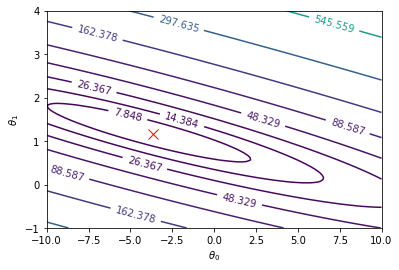

In [12]:
#绘制轮廓曲线,因为J与theta0和theta1两个参数有关
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show()



